In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
df.columns = ['Sales']

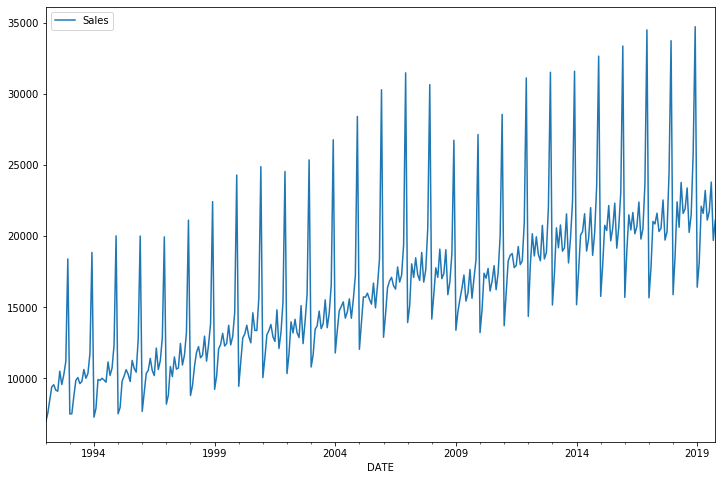

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

334

In [8]:
len(df) - 18  # Training the network for 18 months at a time

316

In [9]:
test_size = 18
test_ind = len(df) - test_size

In [10]:
train = df.iloc[:test_ind]
test= df.iloc[test_ind:]

In [11]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [12]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
len(test)

18

**Since length of test set is 18 months, length in the generator must be less than 18 months. For convinience purpose we choose 12 months as it will cover a whole year.**

In [19]:
length = 12

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=1)

In [20]:
X,y = generator[0]

In [21]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [22]:
y

array([[0.02047633]])

In [23]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

###  Creating the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
n_features = 1

In [26]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='mse')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length=length, batch_size=1)

In [32]:
model.fit_generator(generator, epochs=20,
                    validation_data= validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 13s 41ms/step - loss: 0.0249 - val_loss: 0.0031
Epoch 2/20
304/304 [==============================] - 14s 45ms/step - loss: 0.0173 - val_loss: 0.0083
Epoch 3/20
304/304 [==============================] - 12s 41ms/step - loss: 0.0103 - val_loss: 0.0022
Epoch 4/20
304/304 [==============================] - 12s 40ms/step - loss: 0.0047 - val_loss: 0.0101
Epoch 5/20
304/304 [==============================] - 12s 41ms/step - loss: 0.0036 - val_loss: 9.8071e-04
Epoch 6/20
304/304 [==============================] - 13s 42ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 7/20
304/304 [==============================] - 12s 41ms/step - loss: 0.0015 - val_loss: 3.6367e-04
Epoch 8/20
304/304 [==============================] - 12s 41ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 9/20
304/304 [==============================] - 13s 41ms/step - loss: 0.0013 - val_loss: 0.0037


In [33]:
losses = pd.DataFrame(model.history.history)

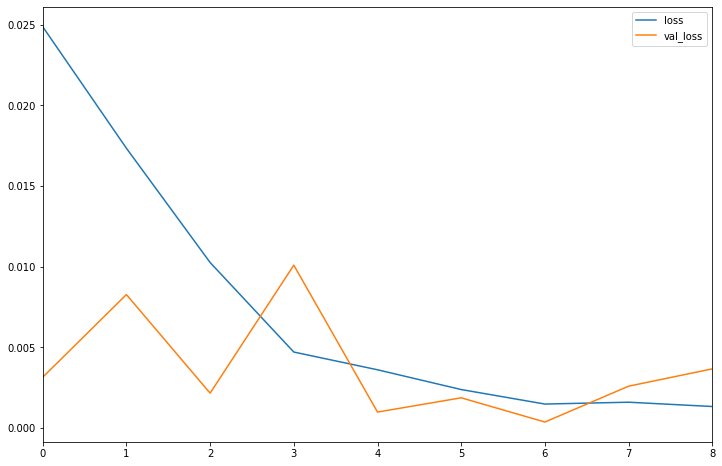

In [34]:
losses.plot(figsize=(12,8))

In [37]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [38]:
true_predictions = scaler.inverse_transform(test_predictions)

In [39]:
test['Predictions'] = true_predictions

c:\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22856.340660
2018-06-01,21589,21641.163030
2018-07-01,21919,21864.455852
2018-08-01,23381,23769.559359
2018-09-01,20260,21175.104587
2018-10-01,21473,21890.901166
2018-11-01,25831,25999.693314
2018-12-01,34706,36341.653291
2019-01-01,16410,16956.196960


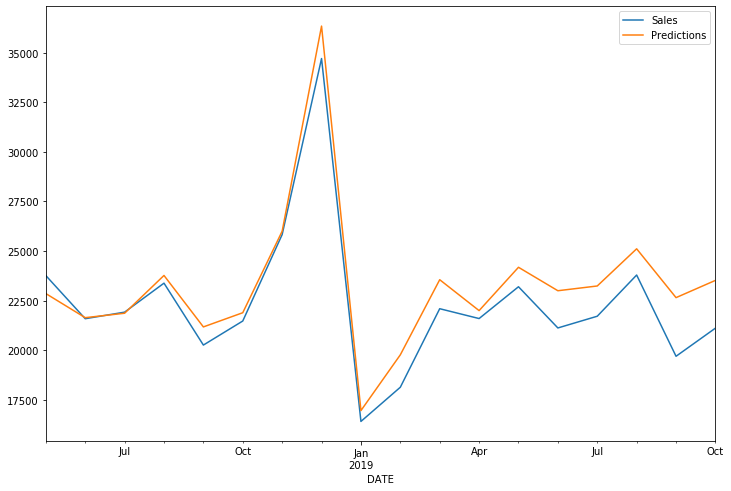

In [41]:
test.plot(figsize=(12,8))

### Forecasting

In [42]:
full_scaler = MinMaxScaler()
full_scaled_data = full_scaler.fit_transform(df)

In [43]:
length = 12

In [44]:
generator = TimeseriesGenerator(full_scaled_data, full_scaled_data,
                                length=length, batch_size=1)

In [45]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length,n_features)))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='mse')

In [47]:
model.fit_generator(generator, epochs=6)

Epoch 1/6
322/322 [==============================] - 12s 36ms/step - loss: 0.0222
Epoch 2/6
322/322 [==============================] - 11s 35ms/step - loss: 0.0166
Epoch 3/6
322/322 [==============================] - 11s 34ms/step - loss: 0.0065
Epoch 4/6
322/322 [==============================] - 11s 34ms/step - loss: 0.0041
Epoch 5/6
322/322 [==============================] - 11s 33ms/step - loss: 0.0030
Epoch 6/6
322/322 [==============================] - 11s 33ms/step - loss: 0.0023


In [49]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = full_scaled_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
final_forecast = scaler.inverse_transform(forecast)

In [51]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [53]:
final_forecast

array([[26448.52158737],
       [36787.66432095],
       [17421.14804339],
       [18939.34845757],
       [22188.6802001 ],
       [21942.89539909],
       [23450.09936953],
       [21763.14179659],
       [22311.73267126],
       [24106.89308357],
       [20804.52541733],
       [22102.54412699]])

In [54]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods,
                               freq='MS')

In [55]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [56]:
forecast_df = pd.DataFrame(data=final_forecast, index=forecast_index,
                           columns=['Forecast'])

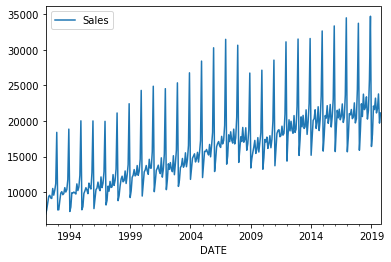

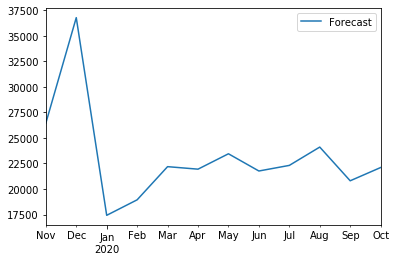

In [59]:
df.plot()
forecast_df.plot()

(576, 611)

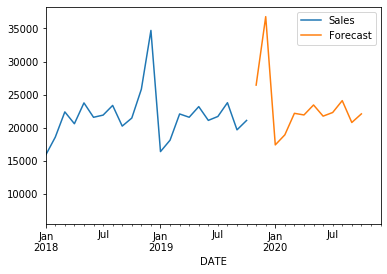

In [63]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')